In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [24]:
dataset = pd.read_csv('Dataset .csv')

In [26]:
dataset['Cuisines'] = dataset['Cuisines'].fillna('Unknown')

In [28]:
label_encoder = LabelEncoder()
dataset['Cuisines'] = label_encoder.fit_transform(dataset['Cuisines'])

In [30]:
features = ['Price range', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Votes']
for feature in ['Has Table booking', 'Has Online delivery']:
    dataset[feature] = dataset[feature].map({'Yes': 1, 'No': 0})
X = dataset[features]
y = dataset['Cuisines']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Generate a classification report with correct target names
print("\nClassification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    labels=range(len(label_encoder.classes_)),  # Ensure correct label range
    target_names=label_encoder.classes_
))


Accuracy: 0.08529565672422815

Classification Report:

                                                                                               precision    recall  f1-score   support

                                                                                      Afghani       0.00      0.00      0.00         0
                                                                    Afghani, Mughlai, Chinese       0.00      0.00      0.00         0
                                                                        Afghani, North Indian       0.00      0.00      0.00         0
                                                    Afghani, North Indian, Pakistani, Arabian       0.00      0.00      0.00         0
                                                                                      African       0.00      0.00      0.00         0
                                                                          African, Portuguese       0.00      0.00      0.00         0

C:\Users\Pranav Rangate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pranav Rangate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pranav Rangate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prana

In [37]:
performance_df = pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test),
                                'Predicted': label_encoder.inverse_transform(y_pred)})

In [38]:
incorrect_predictions = performance_df[performance_df['Actual'] != performance_df['Predicted']]
print("\nIncorrect Predictions:\n")
print(incorrect_predictions)


Incorrect Predictions:

                              Actual                    Predicted
0                       North Indian                 South Indian
1                Mughlai, Hyderabadi        North Indian, Mughlai
2              North Indian, Mughlai                      Chinese
3                          Fast Food                  Street Food
4              North Indian, Mughlai                      Chinese
...                              ...                          ...
1905                    South Indian                 North Indian
1906  North Indian, Mughlai, Chinese                Cafe, Italian
1908              Chinese, Fast Food             Pizza, Fast Food
1909                     Continental  North Indian, Chinese, Thai
1910                   International                    Brazilian

[1748 rows x 2 columns]


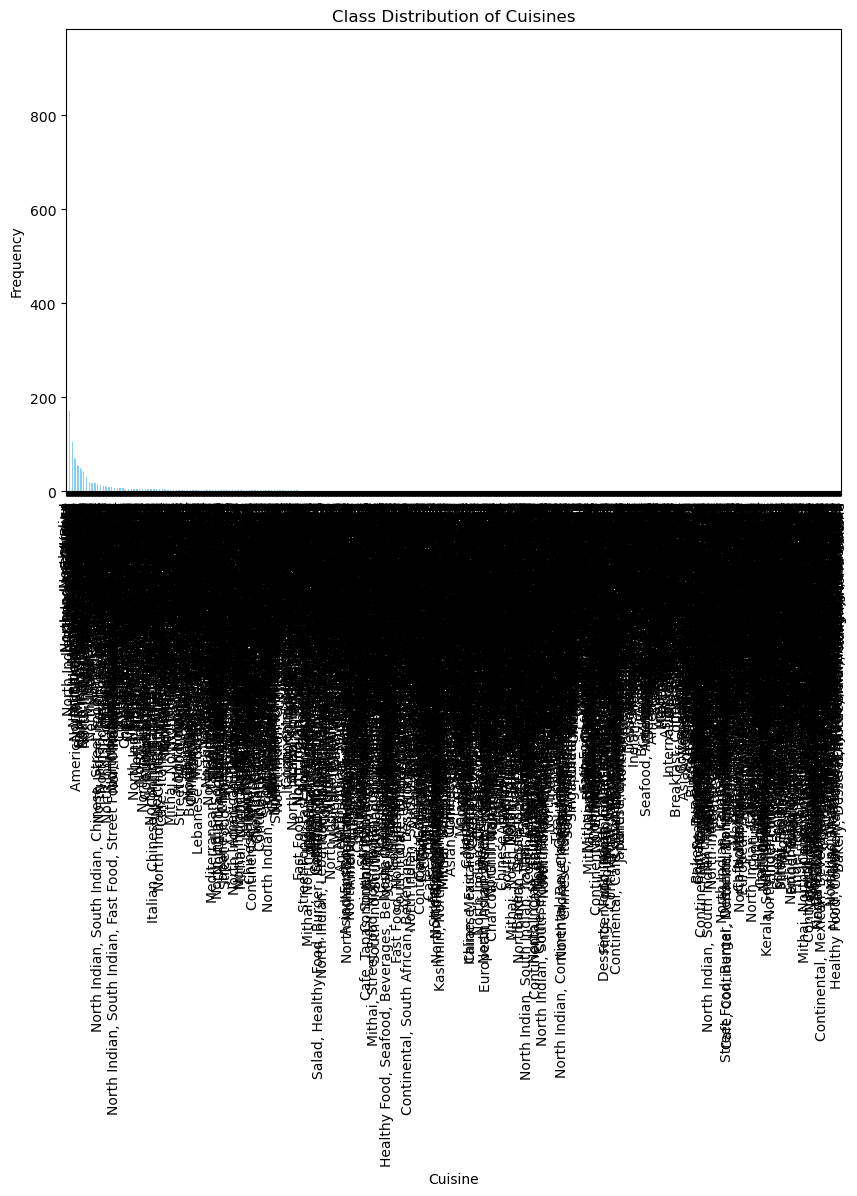

In [42]:
plt.figure(figsize=(10, 6))
y_encoded = label_encoder.inverse_transform(y)
class_counts = pd.Series(y_encoded).value_counts()
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.show()


C:\Users\Pranav Rangate\AppData\Local\Temp\ipykernel_8928\1277299423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


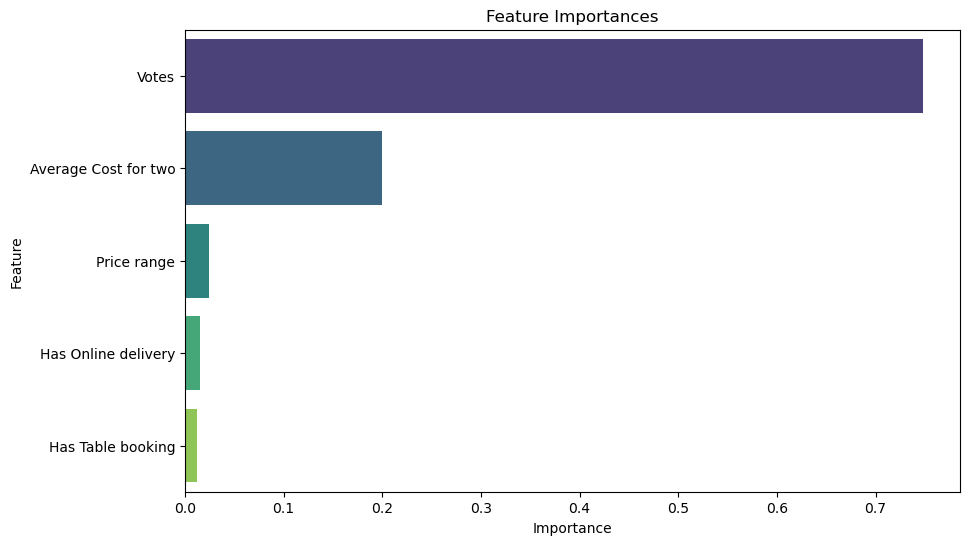

In [44]:
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


NameError: name 'confusion_matrix' is not defined

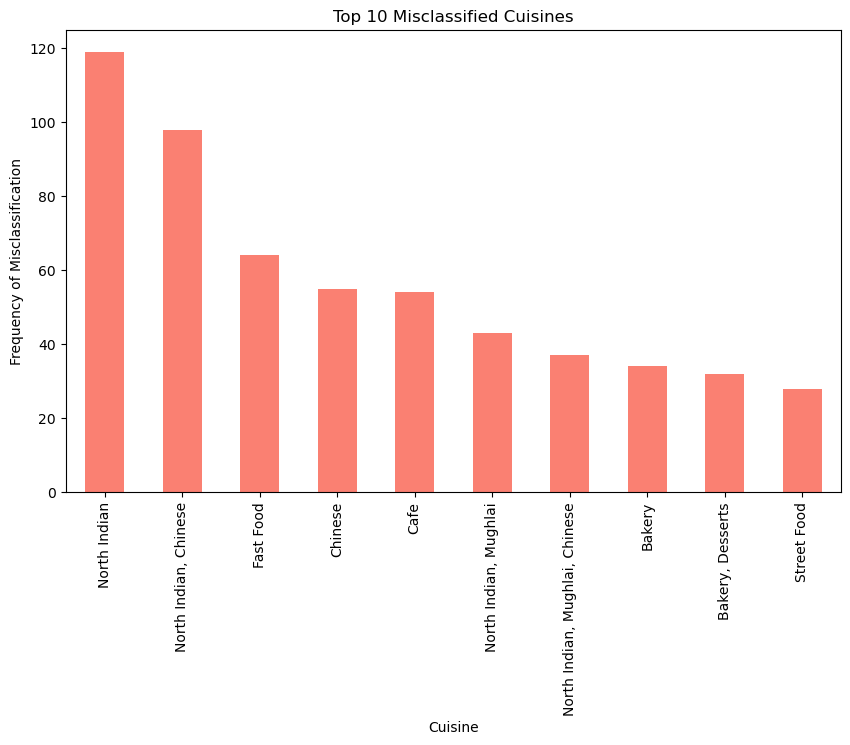

In [48]:
incorrect_counts = incorrect_predictions['Actual'].value_counts()
plt.figure(figsize=(10, 6))
incorrect_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Misclassified Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Frequency of Misclassification')
plt.show()
